In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

UNCLASSIFIED = False
NOISE = 0

In [2]:
def loadDataSet(fileName,splitChar='\t'):
    dataSet=[]
    with open(fileName)as f:
        for line in f.readlines():
            curline = line.strip().split(splitChar)
            fltline = list(map(float,curline))
            dataSet.append(fltline)
    return dataSet

In [3]:
#计算两个向量欧式距离
def dist(a,b):
    return math.sqrt(np.power(a-b,2).sum())

In [4]:
#判断是否在eps范围内
def eps_neighbor(a,b,eps):
    return dist(a,b)<eps

In [5]:
def region_query(data,pointId,eps):
    """
    输入数据集，查询点的id，半径大小，
    输出在eps范围内的点的id
    """
    nPoints = data.shape[1]
    seeds = []
    for i in range(nPoints):
        if eps_neighbor(data[:,pointId],data[:,i],eps):
            seeds.append(i)
    return seeds

In [6]:
def expand_cluster(data,clusterResult,pointId,clusterId,eps,minPts):
    """
    输入:数据,分类结果，待分类点id，簇id，半径大小，
    输出：能否成功分类
    """
    seeds = region_query(data,pointId,eps)
    if len(seeds)<minPts:
        clusterResult[pointId]=NOISE
        return False
    else:
        clusterResult[pointId]=clusterId
        for seedId in seeds:
            clusterResult[seedId]=clusterId
    while len(seeds)>0:
        currentPoint = seeds[0]
        queryResults = region_query(data,currentPoint,eps)
        if len(queryResults)>=minPts:
            for i in range(len(queryResults)):
                resultPoint = queryResults[i]
                if clusterResult[resultPoint]==UNCLASSIFIED:
                    seeds.append(resultPoint)
                    clusterResult[resultPoint]=clusterId
                elif clusterResult[resultPoint]==NOISE:
                    clusterResult[resultPoint] = clusterId
        seeds = seeds[1:]
        return True

In [7]:
def dbscan(data,eps,minPts):
    """
    输入：数据集，半径大小，最小点数
    输出：分类簇id
    """
    clusterId =1
    nPoints = data.shape[1]
    clusterResut = [UNCLASSIFIED]*nPoints
    for pointId in range(nPoints):
        point = data[:,pointId]
        if clusterResut[pointId] == UNCLASSIFIED:
            if expand_cluster(data,clusterResut,pointId,clusterId,eps,minPts):
                clusterId = clusterId+1
    return clusterResut,clusterId-1

In [8]:
#可视化
def plotFeature(data,clusters,clusterNum):
    #nPoints = data.shape[1]
    matClusters = np.mat(clusters).transpose()
    fig = plt.figure()
    scatterColors=np.load('mat_color.npy').tolist()
    ax = fig.add_subplot(111)
    for i in range(clusterNum+1):
        if i == 0:
            colorsytle = 'black'
        else:
            colorsytle = scatterColors[i+1]
        #subCluster = data[:,np.nonzero(matClusters[:,0].A==i)]
        x=data[:,np.nonzero(matClusters[:,0].A==i)][0,:].flatten().A[0]
        y=data[:,np.nonzero(matClusters[:,0].A==i)][1,:].flatten().A[0]
        ax.scatter(x,y,c=colorsytle,s=50)

In [12]:
def main(eps,minPts):
    dataSet = loadDataSet('points.txt',splitChar=',')
    dataSet = np.mat(dataSet).transpose()
    clusters,cluseterNum=dbscan(dataSet,eps,minPts)
    print('cluster Numbers =',cluseterNum)
    plotFeature(dataSet,clusters,cluseterNum)
    plt.show()

cluster Numbers = 35


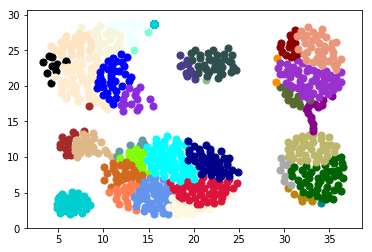

In [13]:
main(4,15)

cluster Numbers = 75


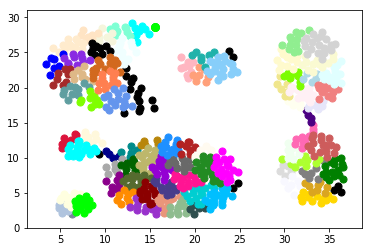

In [14]:
main(2,15)

cluster Numbers = 8


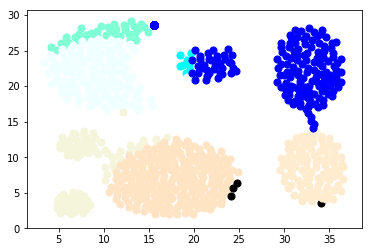

In [15]:
main(10,15)

cluster Numbers = 54


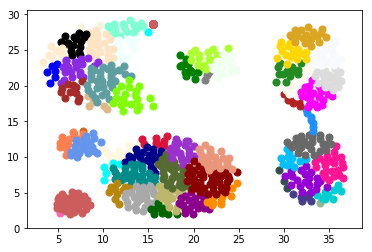

In [16]:
main(3,15)

cluster Numbers = 25


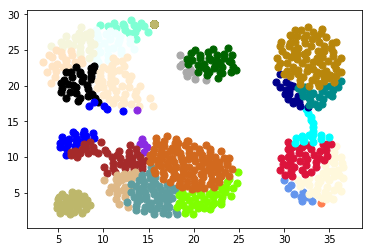

In [17]:
main(5,15)

cluster Numbers = 14


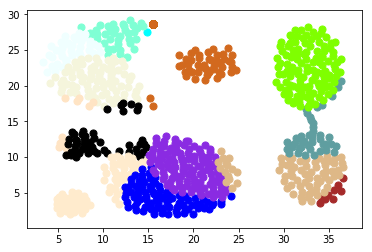

In [18]:
main(7,15)

In [71]:
a = dataSet[:,np.nonzero(matClusters[:,0].A==0)][0,:].flatten().A[0]

In [72]:
b = dataSet[:,np.nonzero(matClusters[:,0].A==0)][1,:].flatten().A[0]

In [49]:
x = dataSet[:,np.nonzero(matClusters[:,0].A==1)][0,:].flatten().A[0]
y = dataSet[:,np.nonzero(matClusters[:,0].A==1)][1,:].flatten().A[0]

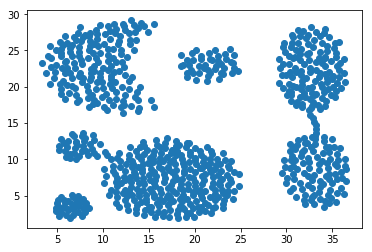

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(a,b,c='red')
# ax.scatter(x,y,c='green',s=50)
ax.scatter(dataSet.A[0],dataSet.A[1])